In [1]:
import pandas as pd
import numpy as np 
import math as mt
import s3fs
import zipfile
import os


class s3_connection():
    def __init__(self):
        """
        établir la connexion et après utiliser les fonction de read et write 
        """
        try:
         s3 = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})
         
         print("connection successful")
         
        except:
         s3="connection not established, debug "
         print(s3)
        self.s3=s3
    def listt(self, directory):
        return((self.s3.ls(directory)))

    def unzip(self,from_s,to_s):
      with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to_path)

    
    def from_pandas_to_parquet_store_in_s3(self,df, directory):
      try:
        with self.s3.open(directory, "wb") as file_out:
         df.to_parquet(file_out)
      except: 
        print("Cher lecteur, cette fonction écrit dans le dossier spécifié, mais vous n'avez pas les droits :( ")
      
    
    def get_tables_from_s3(self,directory):
        
        with self.s3.open(directory, "rb") as file_in:
          df = pd.read_parquet(file_in)
        return df
 

In [2]:
  
    
s3=s3_connection()
directory="aayrapetyan/diffusion/"
tables=s3.listt(directory)

dataframes = {}
words_to_remove = ["aayrapetyan", "diffusion", ".us", "--", "usd-spot","parquet"]
import re
# Loop through all files in the folder
for file_name in tables:
    if file_name.endswith('.parquet') and "final_table" not in file_name:  # Check if the file is a Parquet file
        
        try:
            # Read the Parquet file into a DataFrame
            df = s3.get_tables_from_s3(file_name)
            # Store the DataFrame using the file name (without extension) as the key
            pattern = "|".join(re.escape(word) for word in words_to_remove)
            cleaned_string = re.sub(pattern, "", file_name)
            cleaned_string = re.sub(r"[/\.]+", "/", cleaned_string).strip("/")[0:-1]
            dataframes[cleaned_string] = df
            print(f"Loaded {file_name} successfully!")
        except Exception as e:
            print(f"Error loading {file_name}: {e}")

for key in dataframes.keys():
    print(key)

dataframes["ftx-dai"]

connection successful
Loaded aayrapetyan/diffusion/binance.us-dai-usd-spot.parquet successfully!
Loaded aayrapetyan/diffusion/binance.us-usdc-usd-spot.parquet successfully!
Loaded aayrapetyan/diffusion/binance.us-usdt-usd-spot.parquet successfully!
Loaded aayrapetyan/diffusion/coinbase-dai-usd-spot.parquet successfully!
Loaded aayrapetyan/diffusion/coinbase-usdt-usd-spot.parquet successfully!
Loaded aayrapetyan/diffusion/coinbase-wluna-usd-spot.parquet successfully!
Loaded aayrapetyan/diffusion/ftx-cusdt-usd-spot.parquet successfully!
Loaded aayrapetyan/diffusion/ftx-dai-usd-spot.parquet successfully!
Loaded aayrapetyan/diffusion/ftx-luna-usd-spot.parquet successfully!
Loaded aayrapetyan/diffusion/kraken-dai-usd-spot.parquet successfully!
Loaded aayrapetyan/diffusion/kraken-luna-usd-spot.parquet successfully!
Loaded aayrapetyan/diffusion/kraken-usdc-usd-spot.parquet successfully!
Loaded aayrapetyan/diffusion/kraken-usdt-usd-spot.parquet successfully!
binance-dai
binance-usdc
binance-us

,market,time,coin_metrics_id,amount,price,database_time,side
0,ftx-dai-usd-spot,2022-01-01 00:19:59.720191+00:00,2953428441,3028.9,1.0,2022-01-01 00:20:00.075013+00:00,buy
1,ftx-dai-usd-spot,2022-01-01 00:19:59.720191+00:00,2953428442,2000.0,1.0,2022-01-01 00:20:00.075013+00:00,buy
2,ftx-dai-usd-spot,2022-01-01 00:19:59.720191+00:00,2953428443,1.0,1.0,2022-01-01 00:20:00.075013+00:00,buy
3,ftx-dai-usd-spot,2022-01-01 00:19:59.720191+00:00,2953428444,5.0,1.0,2022-01-01 00:20:00.075013+00:00,buy
4,ftx-dai-usd-spot,2022-01-01 00:19:59.720191+00:00,2953428445,2150.2,1.0,2022-01-01 00:20:00.075013+00:00,buy
...,...,...,...,...,...,...,...
126811,ftx-dai-usd-spot,2022-11-12 03:22:06.088667+00:00,5412623105,29.1,1.013,2022-11-12 03:22:06.375870+00:00,sell
126812,ftx-dai-usd-spot,2022-11-12 03:22:06.224272+00:00,5412623109,49.4,1.013,2022-11-12 03:22:06.375870+00:00,sell
126813,ftx-dai-usd-spot,2022-11-12 03:22:06.258189+00:00,5412623113,29.5,1.013,2022-11-12 03:22:06.375870+00:00,sell
126814,ftx-dai-usd-spot,2022-11-12 03:22:06.354345+00:00,5412623119,42.2,1.013,2022-11-12 03:22:06.625909+00:00,sell


In [3]:
for key in dataframes.keys():
    print(key)

binance-dai
binance-usdc
binance-usdt
coinbase-dai
coinbase-usdt
coinbase-wluna
ftx-cusdt
ftx-dai
ftx-luna
kraken-dai
kraken-luna
kraken-usdc
kraken-usdt


In [ ]:
dataframes

In [5]:
dataframes["ftx-luna"].head(1)

,market,time,coin_metrics_id,amount,price,database_time,side
0,ftx-luna-usd-spot,2022-03-01 14:00:54.781809+00:00,3443610730,98.3,91.72,2022-03-01 14:15:22.169533+00:00,buy


In [15]:
dataframes["binance-dai"].head(1)

,market,time,coin_metrics_id,amount,price,database_time,side
0,binance.us-dai-usd-spot,2022-01-01 00:20:22.742000+00:00,102202,63.28,0.9995,2022-01-01 00:20:22.865667+00:00,sell


In [4]:
multi = [value for key, value in dataframes.items() if "binance" in key]

binance = pd.concat(multi, ignore_index=True)

In [25]:
binance["market"].unique()

<StringArray>
[ 'binance.us-dai-usd-spot', 'binance.us-usdc-usd-spot',
 'binance.us-usdt-usd-spot']
Length: 3, dtype: string

In [26]:
binance.head(1)

,market,time,coin_metrics_id,amount,price,database_time,side
0,binance.us-dai-usd-spot,2022-01-01 00:20:22.742000+00:00,102202,63.28,0.9995,2022-01-01 00:20:22.865667+00:00,sell


In [5]:
df=binance.copy()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:

# Add Month, Year, Day, and Hour columns
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month
df["day"] = df["time"].dt.day
df["hour"] = df["time"].dt.hour


In [74]:
df.groupby(df["market"])["amount"].count()

market
binance.us-dai-usd-spot       17706
binance.us-usdc-usd-spot     594184
binance.us-usdt-usd-spot    3745241
Name: amount, dtype: Int64

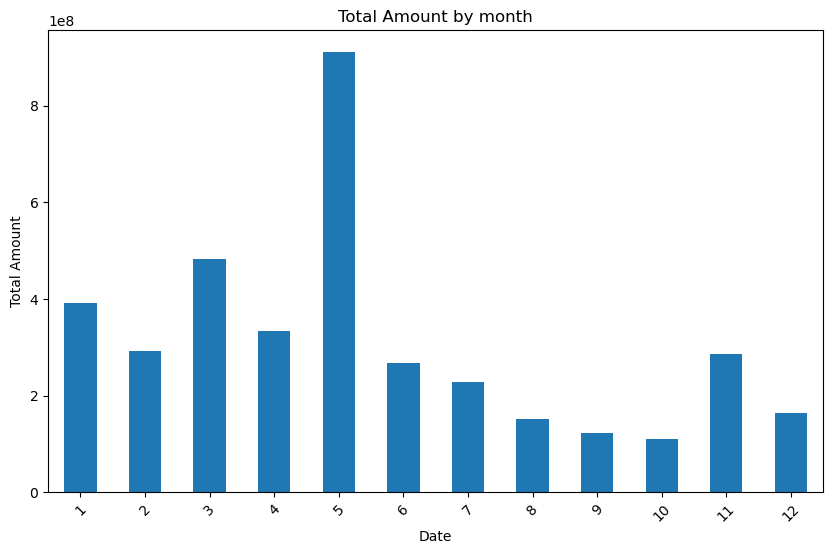

In [15]:

# Aggregated Amount by Day
daily_stats = df.groupby(df["month"])["amount"].sum()
plt.figure(figsize=(10, 6))
daily_stats.plot(kind="bar")
plt.title("Total Amount by month")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()

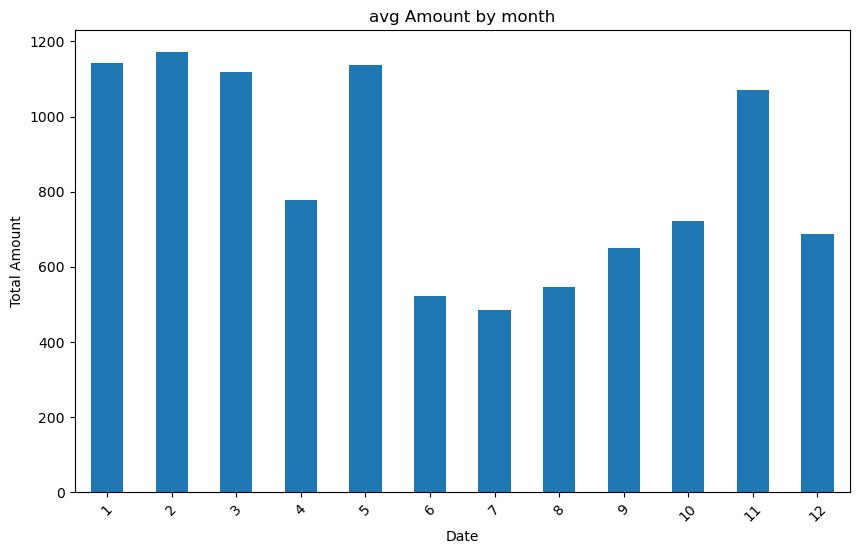

In [16]:
# Aggregated Amount by Day
daily_stats = df.groupby(df["month"])["amount"].mean()
plt.figure(figsize=(10, 6))
daily_stats.plot(kind="bar")
plt.title("avg Amount by month")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()

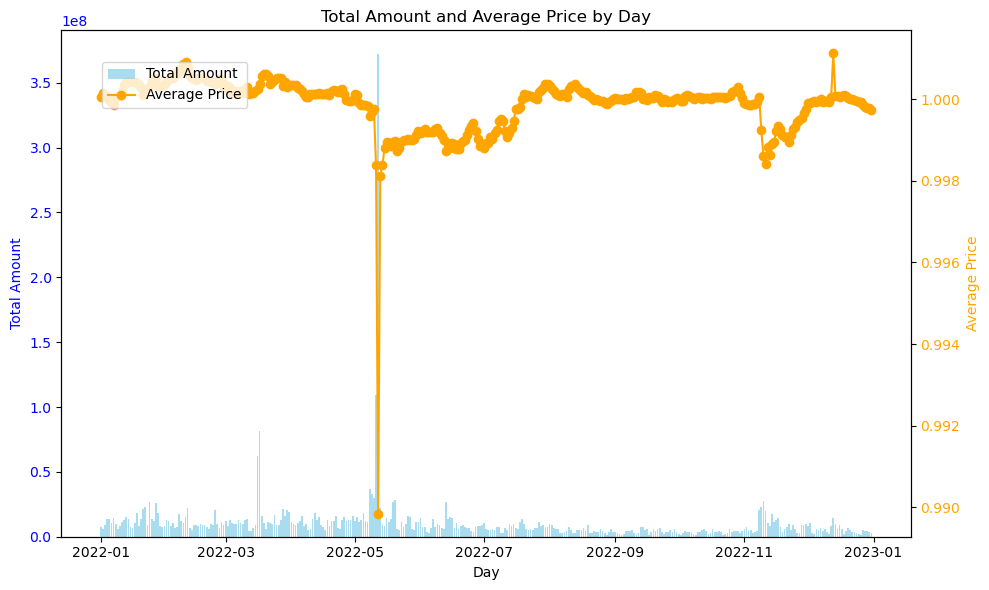

In [65]:
df["day"] = df["time"].dt.date

# Aggregate data by day
daily_stats = df.groupby("day").agg(
    total_amount=("amount", "sum"),
    average_price=("price", "mean")
).reset_index()

# Dual-Axis Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total amount on the primary y-axis
ax1.bar(daily_stats["day"], daily_stats["total_amount"], color="skyblue", label="Total Amount", alpha=0.7)
ax1.set_xlabel("Day")
ax1.set_ylabel("Total Amount", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_title("Total Amount and Average Price by Day")

# Plot average price on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(daily_stats["day"], daily_stats["average_price"], color="orange", label="Average Price", marker="o")
ax2.set_ylabel("Average Price", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
daily_stats['spread']=(daily_stats['average_price']-1)
daily_stats["minus"] = (daily_stats['spread'] < 0).astype(int)
daily_stats['true_spread']=np.abs(daily_stats['spread'])

In [67]:
crush=daily_stats.sort_values("true_spread",ascending=False).head(4)
crush

,day,total_amount,average_price,spread,minus,true_spread
131,2022-05-12,371781311.09,0.989842,-0.010158,1,0.010158
132,2022-05-13,21997937.31,0.998115,-0.001885,1,0.001885
133,2022-05-14,9301124.44,0.998381,-0.001619,1,0.001619
130,2022-05-11,108915308.62,0.998383,-0.001617,1,0.001617


crush

In [68]:
crush_detaled=df.merge(crush,how="inner",on="day")

In [69]:
daily_stats = crush_detaled.groupby(["day", "side"]).agg(
    total_amount=("amount", "sum"),
    average_price=("price", "mean")
).reset_index()

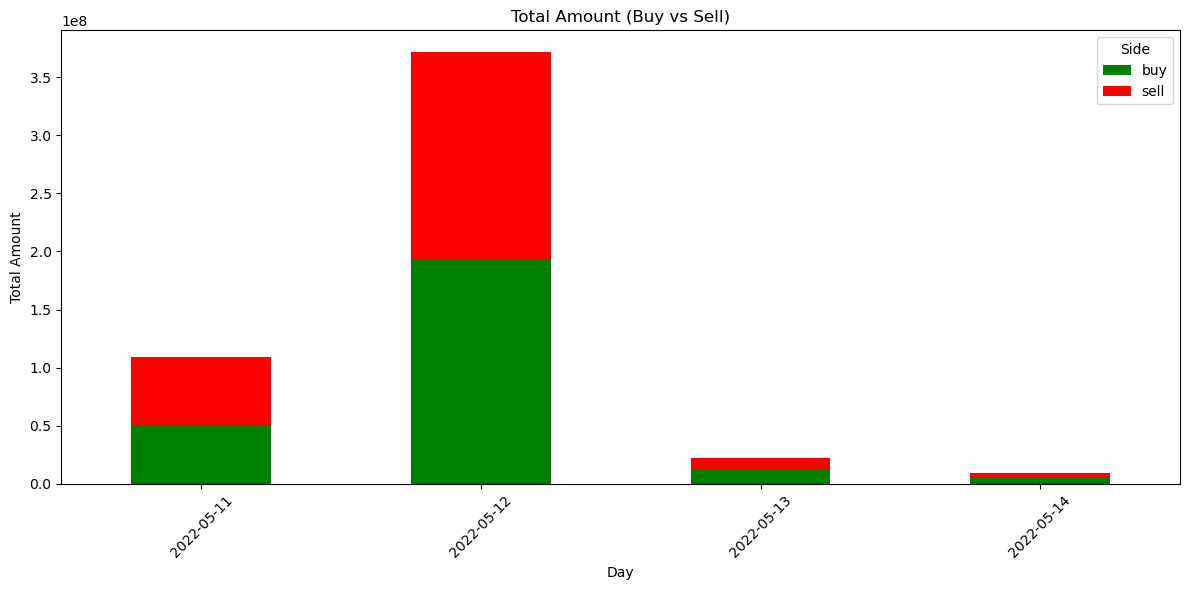

In [70]:
pivot_data = daily_stats.pivot(index='day', columns='side', values='total_amount')

# Plot stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red'])
plt.title('Total Amount (Buy vs Sell)')
plt.xlabel('Day')
plt.ylabel('Total Amount')
plt.legend(title='Side')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

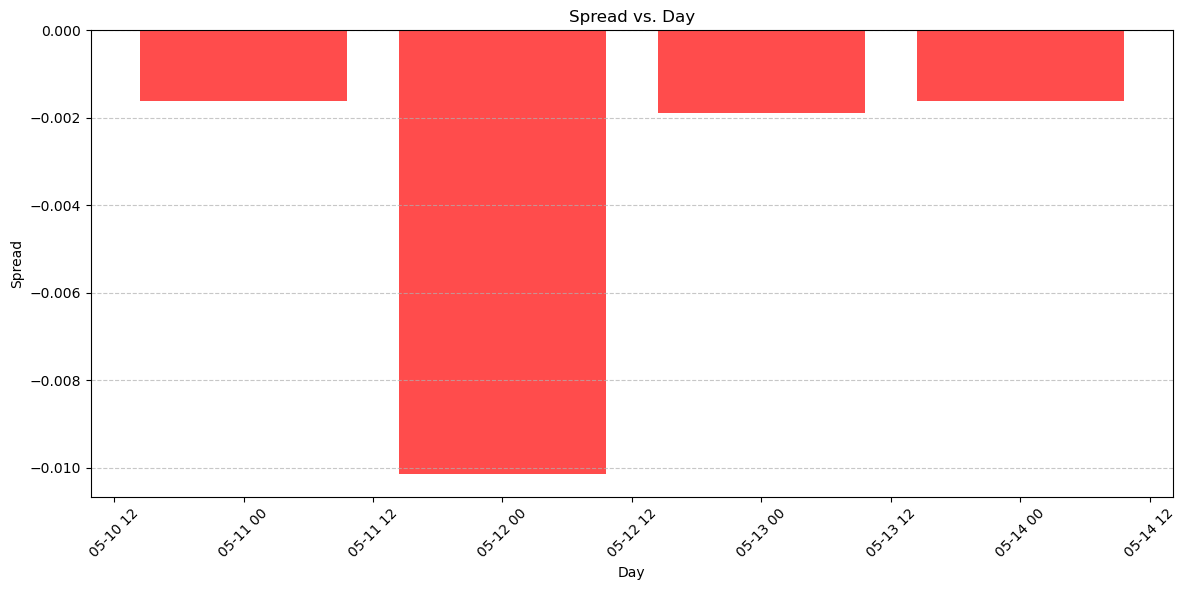

In [71]:

# Plot spread as a bar chart
plt.figure(figsize=(12, 6))
plt.bar( crush['day'], crush['spread'], color='red', alpha=0.7)
plt.title('Spread vs. Day')
plt.xlabel('Day')
plt.ylabel('Spread')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()